In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [24]:
day_ts_df = pd.read_csv("../data/interum/day_timeseries.zip")

In [25]:
day_ts_df.release_date = pd.to_datetime(day_ts_df.release_date)
day_ts_df = day_ts_df.sort_values("release_date").set_index("release_date").copy()

## Resampling into days, months, and years

In [35]:
# choose any attribute to 'len' to get total number of released songs per month
days = day_ts_df.resample("d").agg({"Danceability":len})
days.columns = ["num_releases"]

months = day_ts_df.resample("m").agg({"Danceability":len})
months.columns = ["num_releases"]

years = day_ts_df.resample('y').agg({"Danceability": len})
years.columns = ["num_releases"]

## Plot Decomposition Function

In [45]:
def plot_decomposition(df, date_range=("1950","2018")):
    decomposition = seasonal_decompose(df[date_range[0]:date_range[1]])

    # Gather the trend, seasonality and risidual (noise) of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the various graphs
    plt.figure(figsize=(12,8))

    plt.subplot(411)
    plt.plot(df[date_range[0]:date_range[1]])
    plt.title("Original")
    
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="orange")
    plt.title("Trend Decomposition")

    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color="green")
    plt.title("Seasonal Decomposition")

    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="red")
    plt.title("Risidual Decomposition")

    plt.tight_layout()

***
## Days

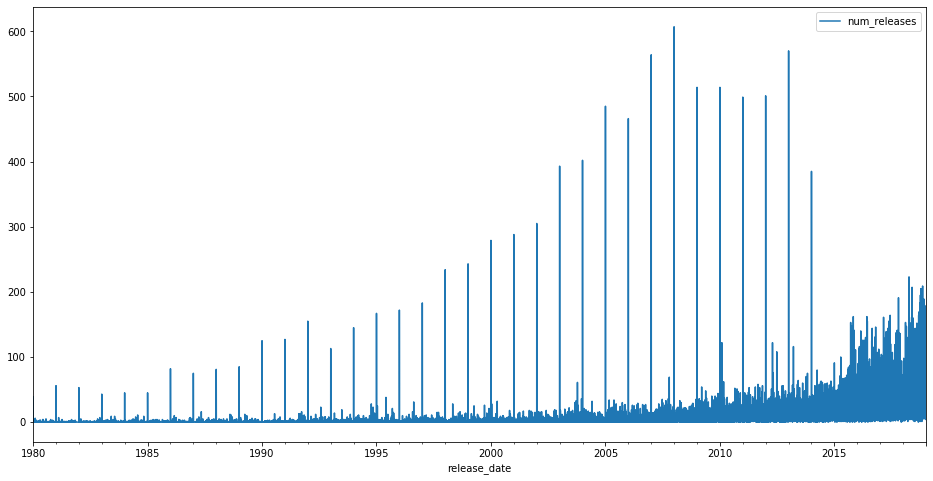

In [41]:
days["1980":"2018"].plot(figsize=(16,8))
plt.show()

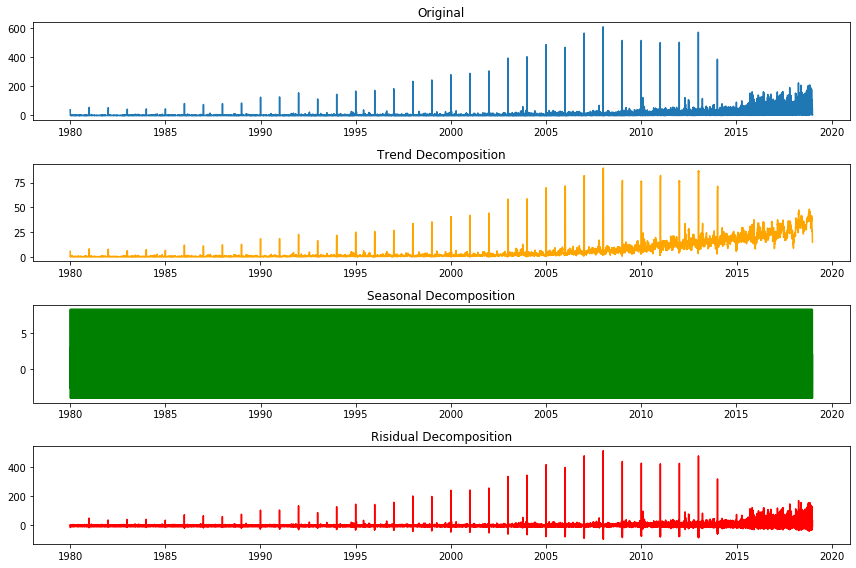

In [48]:
plot_decomposition(days, date_range=("1980", "2018"))

***
## Months

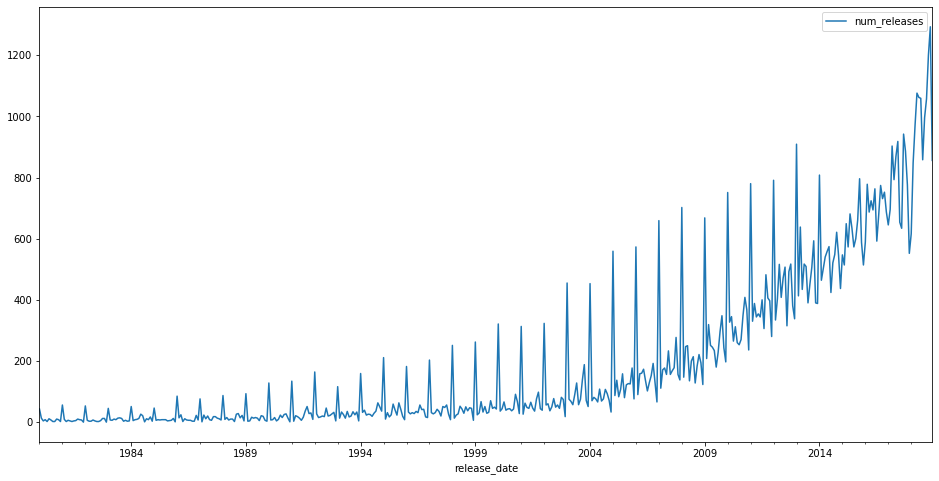

In [42]:
months["1980":"2018"].plot(figsize=(16,8))
plt.show()

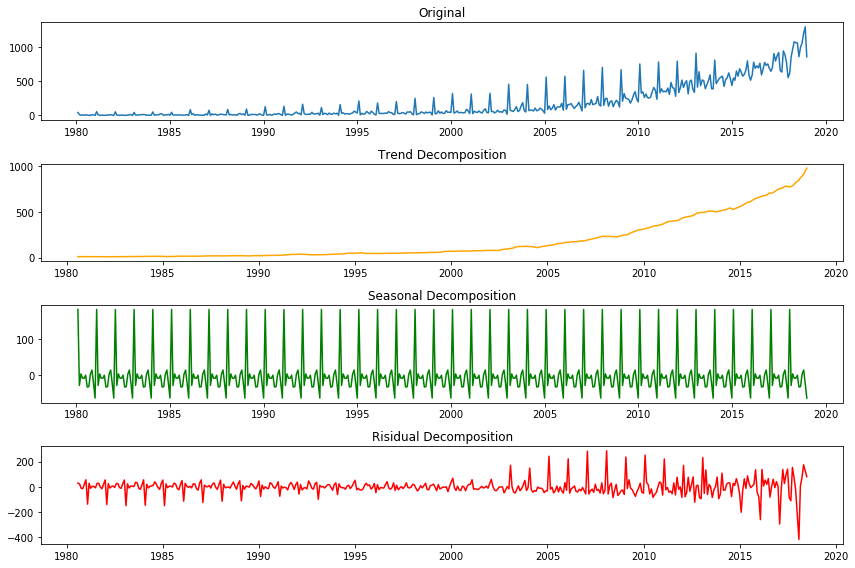

In [49]:
plot_decomposition(months, date_range=("1980", "2018"))

***
## Years

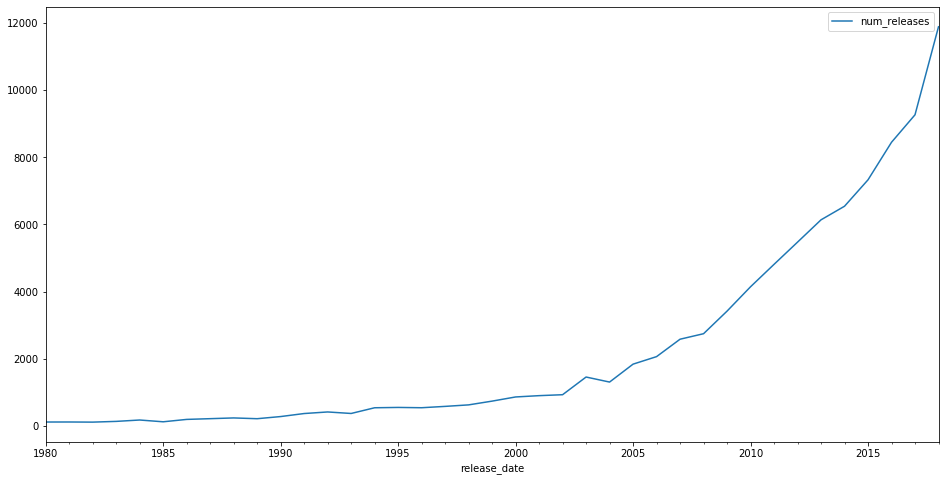

In [43]:
years["1980":'2018'].plot(figsize=(16,8))
plt.show()

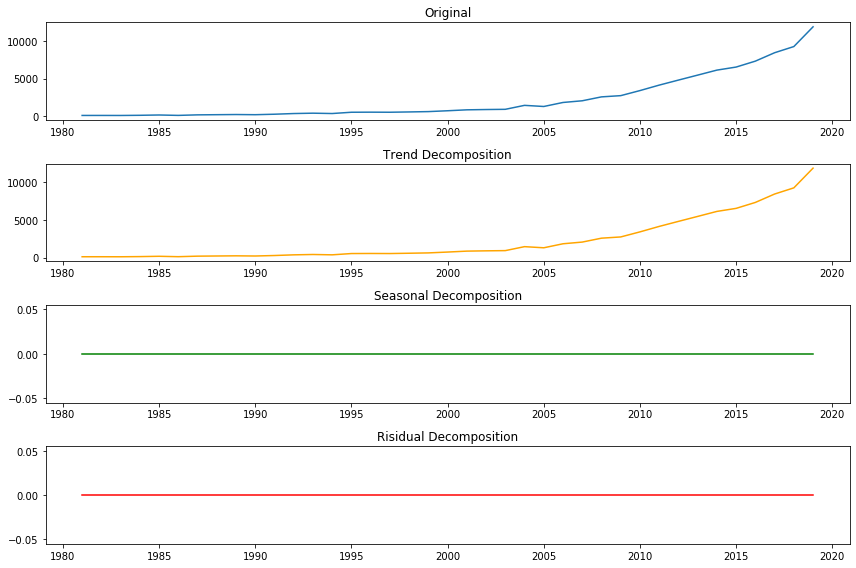

In [52]:
plot_decomposition(years,date_range=("1980", "2018"))

***
## Overlays

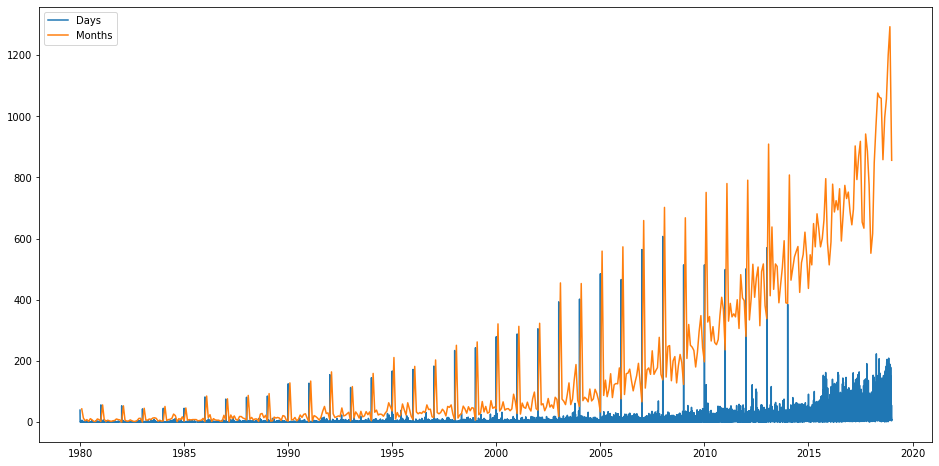

In [62]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.plot(days["1980":"2018"])
plt.plot(months["1980":"2018"])
# plt.plot(years["1980":"2018"])

plt.legend(["Days", "Months", "Years"])
plt.show()

***
# Summary of initial findings:

#### Main Observation:

_There is a clear upwards trend when it comes to the number of songs released per year (that are recorded on the Spotify platform)_

When resampling by day or month, there are relatively large spikes at the beginnings of each year for most of the data. These are likely placeholder values. Songs that had a known release year, but unknown day, appear to have been assigned Jan. 01 as their release day.  

Therefore, our most reliable metric is likely from the yearly resampling where these spikes are rolled into the yearly total releases. This still shows the upwards trend in number of songs released over time. 